In [53]:
#-----------------------Laboratorio 08----------------------------
#Luiz Felipe Barros Alves
#Mat: 120110674

In [1]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

C:\Users\alves\AppData\Local\Temp\ipykernel_16276\3778166921.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import sys, os, imp


In [2]:
# lumapiFile = "/opt/lumerical/v221/api/python/lumapi.py"
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
lumapi = imp.load_source("lumapi", lumapiFile)
modeApi = lumapi.MODE(hide = False)

In [3]:
# units
um = 1e-6
nm = 1e-9

In [4]:
sub_material = 'SiO2 (Glass) - Palik'
core_material = 'Si (Silicon) - Palik'

gap = 200*nm

x_span_core =  5*um
y_span_core =  450*nm
z_span_core =  220*nm

x_core = 0*um
y_core = y_span_core+gap
z_core = 0.0*um

wg90Raius = 10*um

## Create  Acoplador direcional


In [5]:
modeApi.switchtolayout()
modeApi.deleteall()

modeApi.addrect()
modeApi.set("name", "Lc")
modeApi.set("material", core_material)
modeApi.set("x", x_core)
modeApi.set("x span", x_span_core)
modeApi.set("y", y_core)
modeApi.set("y span", y_span_core)
modeApi.set("z", z_core)
modeApi.set("z span", z_span_core)

modeApi.copy()
modeApi.set("name", "Lc_lower")
modeApi.set("y", 0)
modeApi.set('x span', x_span_core*5)

modeApi.addobject("90_bend_wg")
modeApi.set("name", "right")
modeApi.set("base height", z_span_core)
modeApi.set("base width", y_span_core)
modeApi.set("first axis", 'z')
modeApi.set('radius', wg90Raius)
modeApi.set('rotation 1', -90)
modeApi.set('x', x_span_core/2)
modeApi.set('y', y_core+wg90Raius)
modeApi.set('z', z_core)
modeApi.set('material', core_material)

modeApi.copy()
modeApi.set("name", "left")
modeApi.set('rotation 1', 180)
modeApi.set('x', -x_span_core/2)

## Create Solver

In [6]:
# Definir material
fde_solve_material = sub_material

# Definir dimensões e outras características
x_fde = 0*nm
x_span_fde = wg90Raius*3
y_fde = 0*um
y_span_fde = wg90Raius + 5*um
z_fde = 0.0 * um
z_span_fde = 0.0 * um

mesh_cells = 100
mesh_multiplier = 4
number_modes = 4

wavelength = 1550*nm

In [7]:
# Adicionar solver
modeApi.switchtolayout()
modeApi.select('FDE')
modeApi.delete()
modeApi.select('mesh')
modeApi.delete()

modeApi.addfde()
modeApi.set("solver type", "2D Z normal")
modeApi.set("background material", fde_solve_material)

modeApi.set("x", x_fde)
modeApi.set("x span", x_span_fde-3*um)
modeApi.set("y", wg90Raius/2)
modeApi.set("y span", y_span_fde )
modeApi.set("z", z_fde)

modeApi.set("x min bc", "PML")
modeApi.set("x max bc", "PML")
modeApi.set("y min bc", "PML")
modeApi.set("y max bc", "PML")
modeApi.set("mesh cells x", mesh_cells)
modeApi.set("mesh cells y", mesh_cells)

modeApi.set('number of trial modes', number_modes)
modeApi.set('wavelength', wavelength)

# Add mesh
modeApi.addmesh()
modeApi.set('set mesh multiplier', True)
modeApi.set('x', x_fde)
modeApi.set('x span', (x_span_fde-3*um))
modeApi.set('x mesh multiplier', mesh_multiplier)
modeApi.set('y', wg90Raius/2)
modeApi.set('y span', y_span_fde)
modeApi.set('y mesh multiplier', mesh_multiplier)
modeApi.set('z span', 0)
modeApi.set('z', z_fde)

## Índice efetivo 

In [68]:
# nmbOFModes = int(modeApi.findmodes())
# n1 = modeApi.getresult('FDE::data::mode1', 'neff')
# n2 = modeApi.getresult('FDE::data::mode2', 'neff')

# print(f'Índice mode1: {n1}\nÍndice mode2: {n2}')

Índice mode1: [[3.24563289+1.02889205e-17j]]
Índice mode2: [[3.24218327-1.41133402e-18j]]


## Perfil de campo

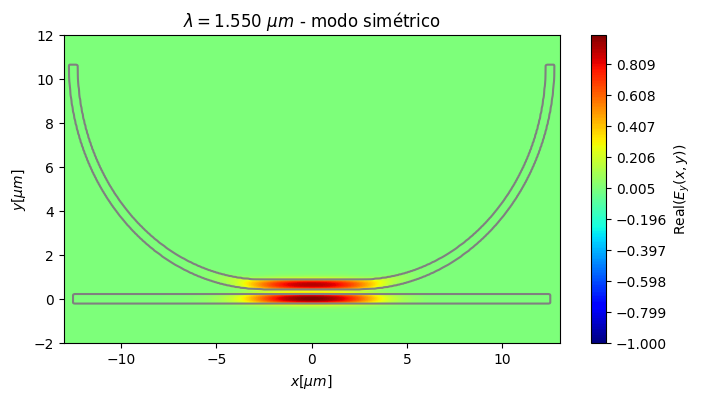

In [69]:
# eField = np.squeeze(modeApi.getresult("FDE::data::mode1", "Ex"))
# x_efield = modeApi.getresult('FDE::data::mode1', 'x')/um*-1
# y_efield = modeApi.getresult('FDE::data::mode1', 'y')/um*-1

# rfIndex = np.squeeze(modeApi.getdata('FDE::data::material', 'index_y'))

# v = np.linspace(-1, 1, 200, endpoint=True)

# fig = plt.figure(figsize=(8, 4))
# ax = fig.add_subplot(111)
# X, Y = np.meshgrid(x_efield, y_efield)

# plt.contour(X, Y+10, np.rot90(rfIndex.real), 0, colors='gray', origin='upper')
# #plt.contour(X, Y+10, np.rot90(eField.real), v, colors='k', vmin=-1, vmax=1)
# im = plt.contourf(X, Y+10, np.rot90(eField.real), v, cmap=plt.cm.jet, vmin=-1, vmax=1)

# colorbar = plt.colorbar(im)
# # colorbar.set_ticks(v)
# colorbar.set_label(r'Real($E_{y}(x,y))$')

# plt.xlabel(r'$x [\mu m]$')
# plt.ylabel(r'$y [\mu m]$')
# plt.title(r'$\lambda = %.3f \ \mu m$ - modo simétrico'%(1e6*wavelength))
# #plt.axis('equal')
# plt.xlim([-13, 13])
# plt.ylim([-2, 12])

# plt.savefig('Perfil_mode_1.png', bbox_inches='tight')
# plt.show()


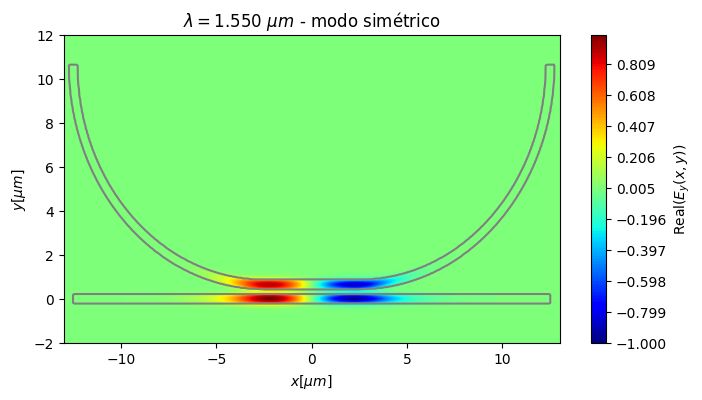

In [70]:
# eField = np.squeeze(modeApi.getresult("FDE::data::mode2", "Ex"))
# x_efield = modeApi.getresult('FDE::data::mode2', 'x')/um*-1
# y_efield = modeApi.getresult('FDE::data::mode2', 'y')/um*-1

# rfIndex = np.squeeze(modeApi.getdata('FDE::data::material', 'index_y'))

# v = np.linspace(-1, 1, 200, endpoint=True)

# fig = plt.figure(figsize=(8, 4))
# ax = fig.add_subplot(111)
# X, Y = np.meshgrid(x_efield, y_efield)

# plt.contour(X, Y+10, np.rot90(rfIndex.real), 0, colors='gray', origin='upper')
# #plt.contour(X, Y+10, np.rot90(eField.real), v, colors='k', vmin=-1, vmax=1)
# im = plt.contourf(X, Y+10, np.rot90(eField.real), v, cmap=plt.cm.jet, vmin=-1, vmax=1)

# colorbar = plt.colorbar(im)
# # colorbar.set_ticks(v)
# colorbar.set_label(r'Real($E_{y}(x,y))$')

# plt.xlabel(r'$x [\mu m]$')
# plt.ylabel(r'$y [\mu m]$')
# plt.title(r'$\lambda = %.3f \ \mu m$ - modo simétrico'%(1e6*wavelength))
# #plt.axis('equal')
# plt.xlim([-13, 13])
# plt.ylim([-2, 12])

# plt.savefig('Pefil_mode_2.png', bbox_inches='tight')
# plt.show()


## Análise de convergência

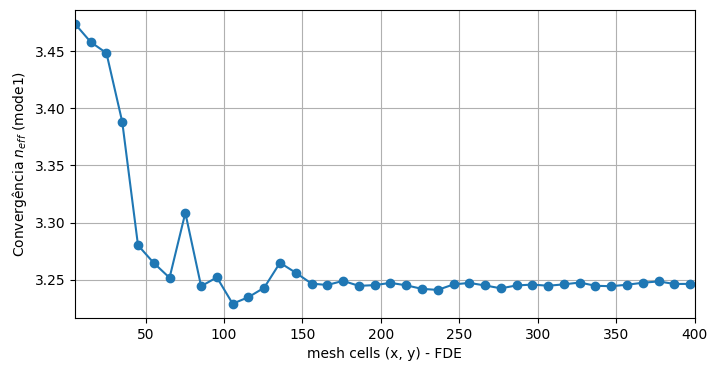

In [111]:
# modeApi.switchtolayout()
# modeApi.select('mesh')
# modeApi.delete()

# mesh_vector = np.linspace(5, 1000, 100)
# neff_vector = np.array([])

# for i in mesh_vector:
#     modeApi.switchtolayout()
#     modeApi.select('FDE')
#     modeApi.set("mesh cells x", i)
#     modeApi.set("mesh cells y", i)
    
#     modeApi.findmodes()
#     n_i = modeApi.getresult('FDE::data::mode1', 'neff')
#     neff_vector = np.append(neff_vector, n_i.real)

# plt.figure(figsize=(8,4))
# plt.plot(mesh_vector, neff_vector, 'o-')
# plt.xlabel('mesh cells (x, y) - FDE')
# plt.ylabel('Convergência $n_{eff}$ (mode1)')
# plt.xlim(5, 400)
# plt.grid()

# plt.savefig('Convergencia.png', bbox_inches='tight')
# plt.show()

## Análise - comprimento de acoplamento em função da distância entre guias 

[0.00012756 0.00018627 0.00013864 0.0001462  0.00015173 0.00017724
 0.0001895  0.00018529 0.00023155 0.00027537 0.00027071 0.00028292
 0.0005204  0.00063824 0.0002487  0.00109016 0.00139866 0.00077402
 0.00146051 0.00167067]


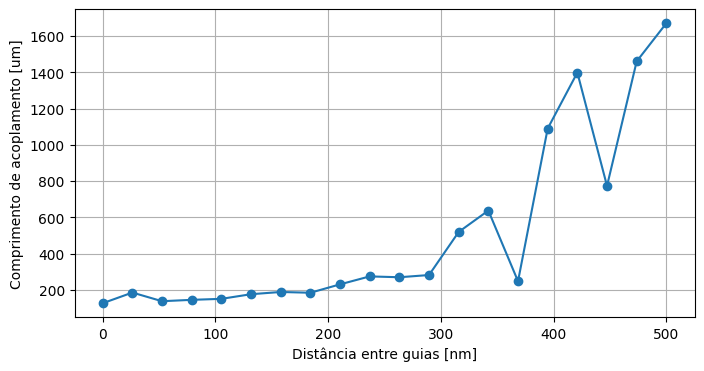

In [124]:
# modeApi.switchtolayout()

# modeApi.select('FDE')
# modeApi.set("mesh cells x", mesh_cells)
# modeApi.set("mesh cells y", mesh_cells)

# modeApi.select('mesh')
# modeApi.delete()

# # Add mesh
# modeApi.addmesh()
# modeApi.set('set mesh multiplier', True)
# modeApi.set('x', x_fde)
# modeApi.set('x span', (x_span_fde-3*um))
# modeApi.set('x mesh multiplier', mesh_multiplier)
# modeApi.set('y', wg90Raius/2)
# modeApi.set('y span', y_span_fde)
# modeApi.set('y mesh multiplier', mesh_multiplier)
# modeApi.set('z span', 0)
# modeApi.set('z', z_fde)

# gap_vector = np.linspace(0*nm, 500*nm, 20)


# delta_n = np.array([])
# for i in gap_vector:
#     modeApi.switchtolayout()

#     modeApi.select('Lc')
#     modeApi.set("y", y_span_core + i)

#     modeApi.select('right')
#     modeApi.set("y", y_span_core + i + wg90Raius)

#     modeApi.select('left')
#     modeApi.set("y", y_span_core + i + wg90Raius)

#     modeApi.findmodes()
#     n1 = modeApi.getresult('FDE::data::mode1', 'neff')
#     n2 = modeApi.getresult('FDE::data::mode2', 'neff')

#     delta_n = np.append(delta_n, np.abs(n1.real - n2.real))

# Lx = wavelength / (2 * delta_n)

# print(Lx)
# fig = plt.figure(figsize=(8, 4))
# plt.plot(gap_vector / nm, Lx / um, 'o-')
# plt.xlabel('Distância entre guias [nm]')
# plt.ylabel('Comprimento de acoplamento [um]')
# # plt.xlim([gap[0] / nm, gap[-1] / nm])
# plt.grid()

# plt.savefig('cross_versus_gap_linear.png', bbox_inches='tight')
# plt.show()


## Análise - acoplamento de potência em função do comprimento do dispositivo

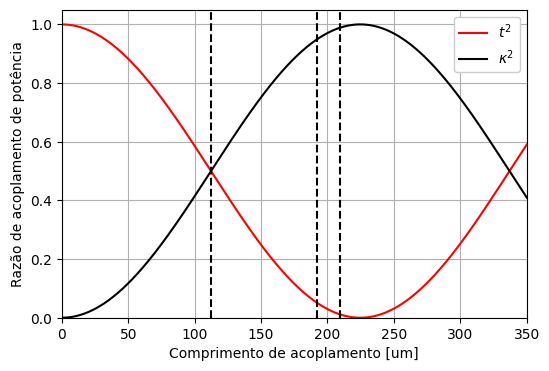

2244
112.21122112211222
3842
192.11921192119215
4193
209.6709670967097


In [8]:
modeApi.switchtolayout()

modeApi.select('Lc')
modeApi.set("y", y_core)

modeApi.select('right')
modeApi.set("y", y_core+wg90Raius)

modeApi.select('left')
modeApi.set("y", y_core + wg90Raius)

modeApi.findmodes()
n1 = modeApi.getresult('FDE::data::mode1', 'neff')
n2 = modeApi.getresult('FDE::data::mode2', 'neff')

delta_n = np.abs(n1-n2)

L_x = wavelength / (2 * delta_n)

lenDC = np.linspace(0, 500 * um, 10000)
tSqr = np.squeeze((np.cos(np.pi / 2 * lenDC / L_x))**2)
kappaSqr = np.squeeze((np.sin(np.pi / 2 * lenDC / L_x))**2)

fig = plt.figure(figsize=(6, 4))
plt.plot(lenDC / um, tSqr, 'r-', label='$t^2$')
plt.plot(lenDC / um, kappaSqr, 'k-', label='$\kappa^2$')
plt.plot([112.21, 112.21], [0, 1.05], '--k')
plt.plot([192.119, 192.119], [0, 1.05], '--k')
plt.plot([209.6709, 209.6709], [0, 1.05], '--k')


plt.xlabel('Comprimento de acoplamento [um]')
# plt.xticks(range(0, 55, 5))
plt.ylabel('Razão de acoplamento de potência')
plt.xlim([0, 350])
plt.ylim([0, 1.05])
plt.grid()
plt.legend(loc=1, framealpha=1)

# LEGENDA VERTICAL
# plt.text(1551,0.95,r'$T_{in}=0.997642$', rotation = 0, fontsize=15)
# plt.text(1551,0.46,r'$T_{out1}=T_{out2}=0.437417$', rotation = 0, fontsize=15)

plt.savefig('acoplamento_pot.png', bbox_inches='tight')
plt.show()

# print(kappaSqr)

tol = 0.001

for i in range(len(kappaSqr)):
    if ((kappaSqr[i] <= 0.5 + tol) and (kappaSqr[i] >= 0.5 - tol)):
        print(i)
        print(lenDC[i]/um)
        break

for i in range(len(kappaSqr)):
    if ((kappaSqr[i] <= 0.95 + tol) and (kappaSqr[i] >= 0.95 - tol)):
        print(i)
        print(lenDC[i]/um)
        break

for i in range(len(kappaSqr)):
    if ((kappaSqr[i] <= 0.99 + tol) and (kappaSqr[i] >= 0.99 - tol)):
        print(i)
        print(lenDC[i]/um)
        break





In [64]:
# modeApi.close()